# Education in Iraq - MICS data

Latest update: September 2023, JW

Data available from: https://mics.unicef.org/surveys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

## Dataframe: merge and overview

In [3]:
mics_hh = pd.read_spss('Documents/Data Science/data/Iraq MICS6 Datasets/hh.sav').rename(str.lower, axis='columns')
mics_hl = pd.read_spss('Documents/Data Science/data/Iraq MICS6 Datasets/hl.sav').rename(str.lower, axis='columns')

In [4]:
mics_hh.head()

,hh1,hh2,hh3,hh4,hh5d,hh5m,hh5y,hh6,hh7,hh8,...,windex5,windex10,wscoreu,windex5u,windex10u,wscorer,windex5r,windex10r,psu,strata
0,1.0,1.0,412.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
1,1.0,2.0,413.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,DUHOK
2,1.0,3.0,415.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.047133,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
3,1.0,4.0,412.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,DUHOK
4,1.0,5.0,413.0,411.0,10.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.239107,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK


In [5]:
mics_hl.head()

,hh1,hh2,hint,hl1,hl3,hl4,hl5m,hl5y,hl6,hl8,...,windex5,windex10,wscoreu,windex5u,windex10u,wscorer,windex5r,windex10r,psu,strata
0,1.0,1.0,412.0,1.0,HEAD,MALE,JULY,1955.0,62.0,0.0,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
1,1.0,1.0,412.0,2.0,SPOUSE,FEMALE,JULY,1959.0,58.0,0.0,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
2,1.0,1.0,412.0,3.0,SON / DAUGHTER,FEMALE,MARCH,1994.0,24.0,3.0,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
3,1.0,1.0,412.0,4.0,SERVANT (LIVE-IN),FEMALE,DECEMBER,1989.0,28.0,4.0,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
4,1.0,3.0,415.0,1.0,HEAD,MALE,FEBRUARY,1974.0,44.0,0.0,...,Richest,10th decile,2.047133,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK


#### Merge data

In [6]:
mics = pd.merge(mics_hh, mics_hl, on=['hh1', 'hh2'])

In [7]:
mics['hh46'].value_counts()

COMPLETED                                                                          131394
DWELLING DESTROYED                                                                      0
DWELLING VACANT OR ADDRESS NOT A DWELLING                                               0
ENTIRE HOUSEHOLD ABSENT FOR EXTENDED PERIOD OF TIME                                     0
NO HOUSEHOLD MEMBER AT HOME OR NO COMPETENT RESPONDENT AT HOME AT TIME OF VISIT         0
OTHER                                                                                   0
REFUSED                                                                                 0
Name: hh46, dtype: int64

In [8]:
# keep individuals with completed interview
mics = mics.drop(mics[mics['hh46'] != 'COMPLETED'].index)

In [9]:
mics.head()

,hh1,hh2,hh3,hh4,hh5d_x,hh5m_x,hh5y_x,hh6_x,hh7_x,hh8,...,windex5_y,windex10_y,wscoreu_y,windex5u_y,windex10u_y,wscorer_y,windex5r_y,windex10r_y,psu_y,strata_y
0,1.0,1.0,412.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
1,1.0,1.0,412.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
2,1.0,1.0,412.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
3,1.0,1.0,412.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
4,1.0,3.0,415.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.047133,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK


In [10]:
mics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131394 entries, 0 to 131393
Columns: 295 entries, hh1 to strata_y
dtypes: category(230), float64(65)
memory usage: 95.1 MB


## Data preparation

### Sociodemographic information

In [11]:
# birth year
mics['byear'] = pd.to_numeric(mics['hl5y'], errors='coerce') 
mics['byear'].value_counts(normalize=True)

2011.0    0.029868
2010.0    0.029533
2009.0    0.028916
2012.0    0.028886
2013.0    0.027889
            ...   
1915.0    0.000015
1924.0    0.000015
1912.0    0.000015
1907.0    0.000015
1903.0    0.000008
Name: byear, Length: 106, dtype: float64

In [12]:
# age
mics.rename(columns={'hl6': 'age'}, inplace=True)

In [13]:
# gender
mics['gender'] = mics['hl4'].str.lower()
mics['gender'].value_counts()

male      66538
female    64856
Name: gender, dtype: int64

In [15]:
# region
mics['region'] = mics['hh7_x'].str.title()
mics['region'].value_counts()

Baghdad        14316
Muthana         8095
Thiqar          7745
Anbar           7612
Basrah          7579
Qadisyah        7560
Misan           7529
Nainawa         7134
Najaf           7035
Salahaddin      7035
Wasit           6970
Diala           6878
Duhok           6827
Babil           6785
Karbalah        6696
Kirkuk          5803
Erbil           4971
Sulaimaniya     4824
Name: region, dtype: int64

In [17]:
# area (urban/rural)
mics['area'] = mics['hh6_x'].str.lower()
mics['area'].value_counts()

urban    85838
rural    45556
Name: area, dtype: int64

### Highest education attended

#### Individual-level education

In [18]:
# ever attended school
mics['ed4'].replace(['DK', 'NO RESPONSE'], np.NaN, inplace=True)
mics['ed4'].value_counts(normalize=True)

YES    0.788628
NO     0.211372
Name: ed4, dtype: float64

In [19]:
# highest education attended (individual)
mics['ed5a'].replace(['DK', 'NO RESPONSE'], np.NaN, inplace=True)
mics['ed5a'].value_counts(normalize=True)

PRIMARY                                 0.516591
INTERMEDIATE/LOWER SECONDARY            0.228291
SECONDARY/ UPPER SECONDARY              0.107296
BACHELORS DEGREE                        0.087408
DIPLOMA                                 0.035671
DIPLOMA (5 YEARS AFTER INTERMEDIATE)    0.010689
ECE                                     0.009189
HIGHER EDUCATION                        0.004865
Name: ed5a, dtype: float64

In [20]:
# join information from columns ed4 and ed5a

mics.loc[mics['ed4']=='NO', 'edulevel'] = 0
mics.loc[mics['ed5a']=='ECE', 'edulevel'] = 0
mics.loc[mics['ed5a']=='PRIMARY', 'edulevel'] = 1
mics.loc[mics['ed5a']=='INTERMEDIATE/LOWER SECONDARY', 'edulevel'] = 2
mics.loc[mics['ed5a']=='SECONDARY/ UPPER SECONDARY', 'edulevel'] = 3
mics.loc[mics['ed5a']=='BACHELORS DEGREE', 'edulevel'] = 4
mics.loc[mics['ed5a']=='DIPLOMA', 'edulevel'] = 4
mics.loc[mics['ed5a']=='DIPLOMA (5 YEARS AFTER INTERMEDIATE)', 'edulevel'] = 4
mics.loc[mics['ed5a']=='HIGHER EDUCATION', 'edulevel'] = 4

mics['edulevel'].value_counts(normalize=True)

1.0    0.407384
0.0    0.218645
2.0    0.180031
4.0    0.109326
3.0    0.084614
Name: edulevel, dtype: float64

#### Parental education

In [21]:
mics['parent_edu'] = mics['edulevel'][(mics['hl3']=='HEAD') | (mics['hl3']=='SPOUSE')]

In [22]:
mics['parent_edu'] = mics.groupby(['hh1', 'hh2'])['parent_edu'].transform('max')

In [23]:
mics[['hh1', 'hh2', 'hl3', 'ed4', 'ed5a', 'parent_edu']].head()

,hh1,hh2,hl3,ed4,ed5a,parent_edu
0,1.0,1.0,HEAD,YES,INTERMEDIATE/LOWER SECONDARY,3.0
1,1.0,1.0,SPOUSE,YES,SECONDARY/ UPPER SECONDARY,3.0
2,1.0,1.0,SON / DAUGHTER,YES,BACHELORS DEGREE,3.0
3,1.0,1.0,SERVANT (LIVE-IN),NO,NaN,3.0
4,1.0,3.0,HEAD,YES,INTERMEDIATE/LOWER SECONDARY,3.0


In [24]:
mics['parent_edu'].value_counts(normalize=True)

1.0    0.308390
2.0    0.236779
4.0    0.208719
0.0    0.140146
3.0    0.105966
Name: parent_edu, dtype: float64

In [25]:
# map values to educational variables

edumap = {0:'no education', 1:'primary', 2:'lower secondary', 3:'upper secondary', 4:'higher'}

mics['edulevel'] = mics['edulevel'].map(edumap)
mics['parent_edu'] = mics['parent_edu'].map(edumap)

### Information on current educational situation

In [26]:
# currently attending education?
mics['ed9'].replace(['DK', 'NO RESPONSE'], np.NaN, inplace=True)
mics['ed9'].value_counts(normalize=True)

YES    0.726111
NO     0.273889
Name: ed9, dtype: float64

In [27]:
# educational level currently attended
mics['ed10a'].replace(['DK', 'NO RESPONSE'], np.NaN, inplace=True)
mics['ed10a'].value_counts(normalize=True)

PRIMARY                                 0.579945
INTERMEDIATE/LOWER SECONDARY            0.205195
SECONDARY/ UPPER SECONDARY              0.124680
BACHELORS DEGREE                        0.059435
ECE                                     0.020776
DIPLOMA                                 0.007509
DIPLOMA (5 YEARS AFTER INTERMEDIATE)    0.002055
HIGHER EDUCATION                        0.000406
Name: ed10a, dtype: float64

In [28]:
# join information from columns ed9 and ed10a

mics.loc[mics['ed4']=='NO', 'edustatus'] = 'out of education'
mics.loc[mics['ed9']=='NO', 'edustatus'] = 'out of education'
mics.loc[mics['ed10a']=='ECE', 'edustatus'] = 'ECE'
mics.loc[mics['ed10a']=='PRIMARY', 'edustatus'] = 'primary'
mics.loc[mics['ed10a']=='INTERMEDIATE/LOWER SECONDARY', 'edustatus'] = 'lower secondary'
mics.loc[mics['ed10a']=='SECONDARY/ UPPER SECONDARY', 'edustatus'] = 'upper secondary'
mics.loc[mics['ed10a']=='BACHELORS DEGREE', 'edustatus'] = 'higher'
mics.loc[mics['ed10a']=='DIPLOMA', 'edustatus'] = 'higher'
mics.loc[mics['ed10a']=='DIPLOMA (5 YEARS AFTER INTERMEDIATE)', 'edustatus'] = 'higher'
mics.loc[mics['ed10a']=='HIGHER EDUCATION', 'edustatus'] = 'higher'

mics['edustatus'].value_counts(normalize=True)

out of education    0.507373
primary             0.285696
lower secondary     0.101085
upper secondary     0.061421
higher              0.034191
ECE                 0.010235
Name: edustatus, dtype: float64

#### ECE participation of 4- and 5-year-olds

In [29]:
mics.loc[mics['ed4']=='NO', 'ece_participation'] = 0
mics.loc[mics['ed9']=='NO', 'ece_participation'] = 0
mics.loc[(mics['ed9']=='YES') & (mics['ed10a']!='ECE'), 'ece_participation'] = 0
mics.loc[mics['ed10a']=='ECE', 'ece_participation'] = 1
mics.loc[(mics['age']!=4) & (mics['age']!=5), 'ece_participation'] = np.nan

mics['ece_participation'].value_counts(normalize=True)

0.0    0.914006
1.0    0.085994
Name: ece_participation, dtype: float64

#### Primary school attendance of 7- and 8-year-olds

In [30]:
mics.loc[mics['ed4']=='NO', 'primary_participation'] = 0
mics.loc[mics['ed9']=='NO', 'primary_participation'] = 0
mics.loc[(mics['ed9']=='YES') & (mics['ed10a']!='PRIMARY'), 'primary_participation'] = 0
mics.loc[mics['ed10a']=='PRIMARY', 'primary_participation'] = 1
mics.loc[(mics['age']!=7) & (mics['age']!=8), 'primary_participation'] = np.nan

mics['primary_participation'].value_counts(normalize=True)

1.0    0.923339
0.0    0.076661
Name: primary_participation, dtype: float64

#### Secondary school attendance of 14- to 16-year-olds

In [31]:
mics.loc[mics['ed4']=='NO', 'secondary_participation'] = 0
mics.loc[mics['ed9']=='NO', 'secondary_participation'] = 0
mics.loc[(mics['ed9']=='YES') & (mics['ed10a']!='INTERMEDIATE/LOWER SECONDARY') | (mics['ed10a']!='SECONDARY/ UPPER SECONDARY'), 'secondary_participation'] = 0
mics.loc[(mics['ed10a']=='INTERMEDIATE/LOWER SECONDARY') | (mics['ed10a']=='SECONDARY/ UPPER SECONDARY'), 'secondary_participation'] = 1
mics.loc[(mics['age']!=14) & (mics['age']!=15) & (mics['age']!=16), 'secondary_participation'] = np.nan

mics['secondary_participation'].value_counts()

1.0    5349
0.0    3442
Name: secondary_participation, dtype: int64

### Design Weights

In [33]:
mics['hhweight_x'].describe()

count    131394.000000
mean          0.976327
std           1.474489
min           0.100084
25%           0.457292
50%           0.664970
75%           1.055670
max          37.141684
Name: hhweight_x, dtype: float64

## Data visualization

In [34]:
plt.style.use('ggplot')

### 1. Educational situation of 4- to 18-year-olds

In [36]:
# dataframe for age group 4-18

edu418 = mics.loc[mics['age'].isin([*range(4, 19)]), ['edustatus', 'age', 'hhweight_x']].copy()

edu418.head()

,edustatus,age,hhweight_x
8,out of education,15.0,0.264968
9,out of education,7.0,0.264968
16,upper secondary,16.0,0.264968
19,primary,9.0,0.264968
20,primary,6.0,0.264968


In [38]:
# relative frequencies of educational situation by age

edu418['age'] = edu418['age'].astype('string').apply(lambda x: x.split('.')[0])

pct_edustatus = pd.crosstab(index=edu418['age'], columns=edu418['edustatus'], 
                            values=edu418['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_edustatus = pct_edustatus.reindex(['ECE','primary','lower secondary','upper secondary','higher','out of education'], 
                                      axis='columns').reindex(['4','5','6','7','8','9','10','11','12','13','14','15',
                                                               '16','17','18'])

pct_edustatus

edustatus,ECE,primary,lower secondary,upper secondary,higher,out of education
age,,,,,,
4,4.802996,0.081583,0.000000,0.000000,0.000000,95.115421
5,12.539112,0.732625,0.000000,0.000000,0.000000,86.728263
6,2.791414,64.756362,0.011484,0.000000,0.000000,32.440740
7,0.170325,91.868420,0.108715,0.000000,0.000000,7.852540
8,0.173826,94.687045,0.072249,0.023256,0.000000,5.043623
9,0.131040,92.918972,0.087934,0.015204,0.000000,6.846850
10,0.035575,93.481405,0.144626,0.000000,0.000000,6.338394
11,0.100027,89.393416,0.753791,0.049279,0.025583,9.677904
12,0.082827,54.037229,33.308184,0.144833,0.000000,12.426928


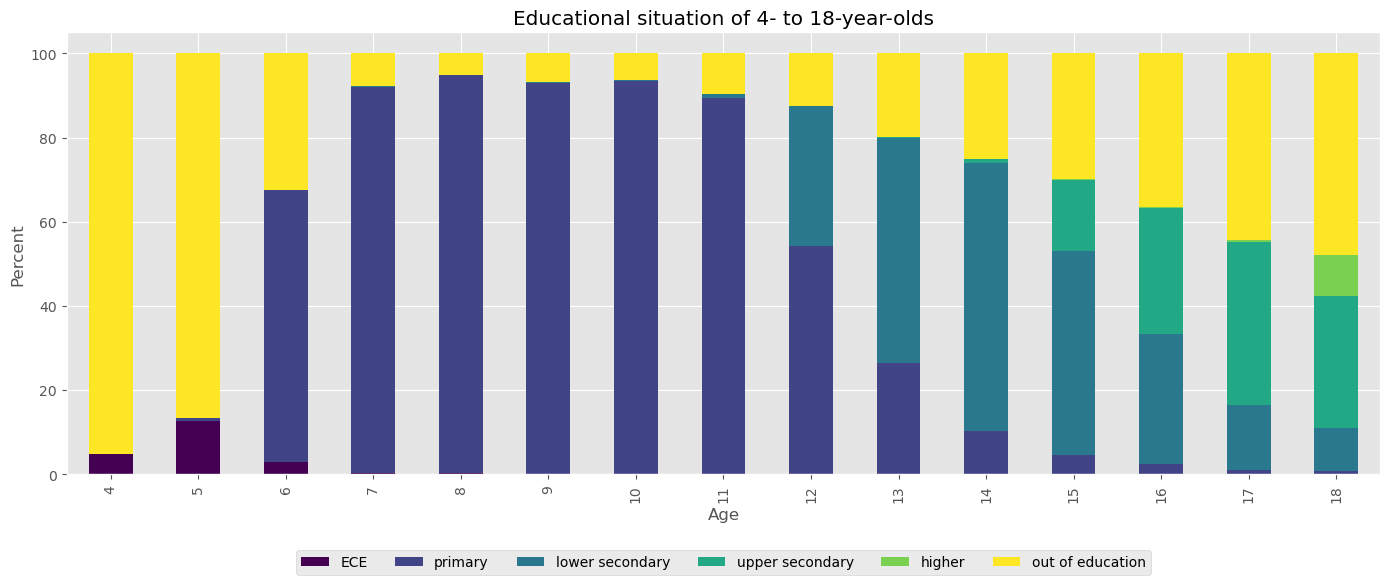

In [39]:
pct_edustatus.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 6))

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='center', ncol=6)
plt.xlabel('Age')
plt.ylabel('Percent')
plt.title('Educational situation of 4- to 18-year-olds')

plt.tight_layout()
plt.savefig('newfig_edu_status_u18.png')

### 2. ECE participation by subgroups

In [43]:
# dataframe for age group 4 & 5 years

eduECE = mics.loc[mics['age'].isin([*range(4, 6)]), 
                ['ece_participation', 'age', 'gender', 'area', 'parent_edu', 'hhweight_x']].copy()

eduECE.head()

,ece_participation,age,gender,area,parent_edu,hhweight_x
48,0.0,5.0,male,urban,higher,0.264968
73,1.0,5.0,female,urban,higher,1.133474
78,1.0,4.0,male,urban,higher,1.133474
94,0.0,5.0,male,urban,higher,1.133474
98,0.0,5.0,female,urban,higher,1.133474


In [45]:
# relative frequencies of total ECE participation

eduECE['total']='total'

pct_ece_total = pd.crosstab(index=eduECE['total'], columns=eduECE['ece_participation'], 
                            values=eduECE['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_ece_total

ece_participation,0.0,1.0
total,,
total,91.094088,8.905912


In [46]:
# relative frequencies of ECE participation by gender

pct_ece_gender = pd.crosstab(index=eduECE['gender'], columns=eduECE['ece_participation'], 
                            values=eduECE['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_ece_gender

ece_participation,0.0,1.0
gender,,
female,90.786850,9.213150
male,91.374774,8.625226


In [60]:
# relative frequencies of ECE participation by age

pct_ece_age = pd.crosstab(index=eduECE['age'], columns=eduECE['ece_participation'], 
                            values=eduECE['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_ece_age = pct_ece_age[pct_ece_age.index.isin([*range(4, 6)])]

pct_ece_age.rename(index={4:'4 yrs', 5:'5 yrs'}, inplace=True)

pct_ece_age

ece_participation,0.0,1.0
age,,
4 yrs,95.197004,4.802996
5 yrs,87.460888,12.539112


In [57]:
# relative frequencies of ECE participation by parental education

pct_ece_hedulevel = pd.crosstab(index=eduECE['parent_edu'], columns=eduECE['ece_participation'], 
                            values=eduECE['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_ece_hedulevel = pct_ece_hedulevel.reindex(['no education','primary','lower secondary','upper secondary','higher'])

pct_ece_hedulevel

ece_participation,0.0,1.0
parent_edu,,
no education,96.019183,3.980817
primary,95.495830,4.504170
lower secondary,92.080613,7.919387
upper secondary,88.092180,11.907820
higher,80.725732,19.274268


In [58]:
# relative frequencies of ECE participation by area

pct_ece_area = pd.crosstab(index=eduECE['area'], columns=eduECE['ece_participation'], 
                            values=eduECE['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_ece_area

ece_participation,0.0,1.0
area,,
rural,97.899011,2.100989
urban,87.782199,12.217801


In [59]:
# concatenate aggregate tables

pct_ece = pd.concat([pct_ece_total, pct_ece_gender, pct_ece_age, pct_ece_hedulevel, pct_ece_area])

pct_ece

ece_participation,0.0,1.0
total,91.094088,8.905912
female,90.786850,9.213150
male,91.374774,8.625226
0.0,0.000000,0.000000
1.0,0.000000,0.000000
...,...,...
lower secondary,92.080613,7.919387
upper secondary,88.092180,11.907820
higher,80.725732,19.274268
rural,97.899011,2.100989


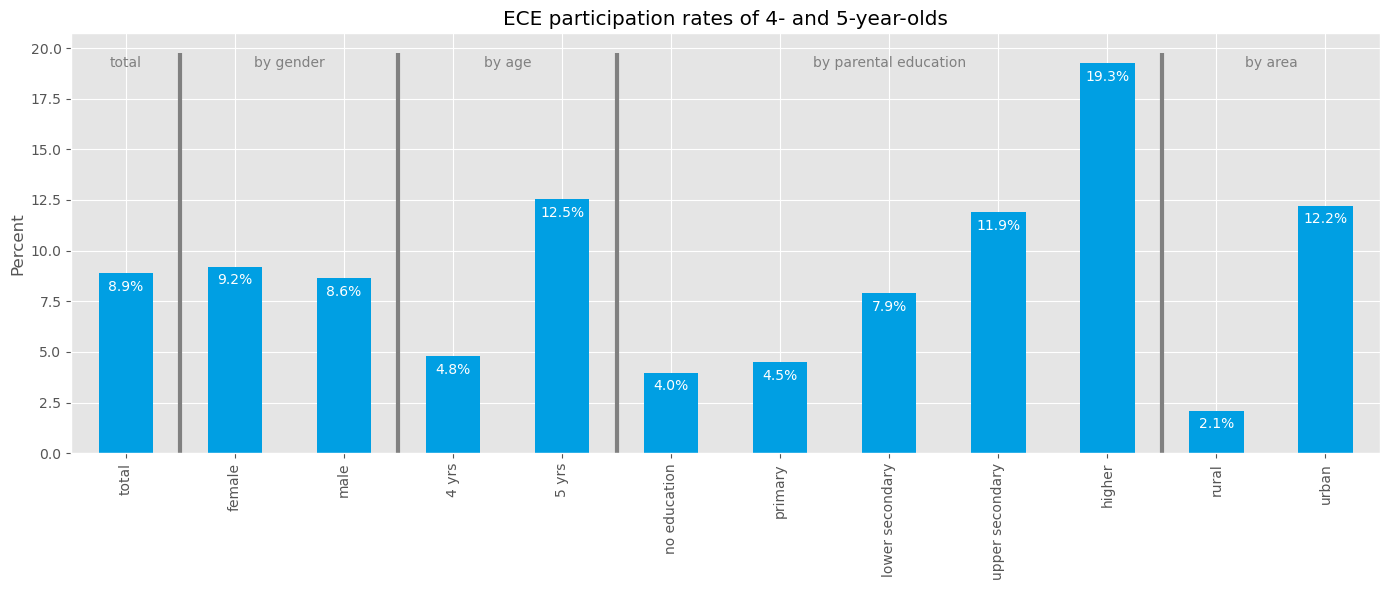

In [101]:
# figure for column 1 (=yes)

fig = pct_ece[1].plot.bar(figsize=(14,6),
                          color='#009fe3')

for c in fig.containers:
    fig.bar_label(c, color='white', padding=-15, fmt='%.1f%%')

fig.set_title('ECE participation rates of 4- and 5-year-olds')
fig.set_ylabel('Percent')

ymin,ymax = fig.get_ylim()
fig.vlines(x=[0.5, 2.5, 4.5, 9.5], lw=3, ymin=ymin, ymax=ymax-0.5, color='gray')
fig.text(0, ymax-1, 'total', horizontalalignment='center', verticalalignment='center', color='gray')
fig.text(1.5, ymax-1, 'by gender', horizontalalignment='center', verticalalignment='center', color='gray')
fig.text(3.5, ymax-1, 'by age', horizontalalignment='center', verticalalignment='center', color='gray')
fig.text(7, ymax-1, 'by parental education', horizontalalignment='center', verticalalignment='center', color='gray')
fig.text(10.5, ymax-1, 'by area', horizontalalignment='center', verticalalignment='center', color='gray')

plt.tight_layout()
plt.savefig('fig2_participation_ece.png')

### 3. Primary school attendance by subgroups

In [61]:
# dataframe for 7- and 8-year-olds

eduPrim = mics.loc[mics['age'].isin([*range(7, 9)]), 
                 ['primary_participation', 'age', 'gender', 'area', 'parent_edu', 'hhweight_x']].copy()

eduPrim.head()

,primary_participation,age,gender,area,parent_edu,hhweight_x
9,0.0,7.0,female,urban,upper secondary,0.264968
37,1.0,7.0,male,urban,higher,0.264968
47,1.0,8.0,male,urban,higher,0.264968
72,1.0,8.0,male,urban,higher,1.133474
93,1.0,7.0,female,urban,higher,1.133474


In [65]:
# relative frequencies of total primary school attendance

eduPrim['total']='total'

pct_prim_total = pd.crosstab(index=eduPrim['total'], columns=eduPrim['primary_participation'], 
                            values=eduPrim['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_prim_total

primary_participation,0.0,1.0
total,,
total,6.788658,93.211342


In [66]:
# relative frequencies of primary school attendance by gender

pct_prim_gender = pd.crosstab(index=eduPrim['gender'], columns=eduPrim['primary_participation'], 
                            values=eduPrim['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_prim_gender

primary_participation,0.0,1.0
gender,,
female,7.457778,92.542222
male,6.198153,93.801847


In [67]:
# relative frequencies of primary school attendance by age

pct_prim_age = pd.crosstab(index=eduPrim['age'], columns=eduPrim['primary_participation'], 
                            values=eduPrim['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_prim_age = pct_prim_age[pct_prim_age.index.isin([*range(7, 9)])]

pct_prim_age.rename(index={7:'7 yrs', 8:'8 yrs'}, inplace=True)

pct_prim_age

primary_participation,0.0,1.0
age,,
7 yrs,8.131580,91.868420
8 yrs,5.312955,94.687045


In [68]:
# relative frequencies of primary school attendance by parental education

pct_prim_hedulevel = pd.crosstab(index=eduPrim['parent_edu'], columns=eduPrim['primary_participation'], 
                            values=eduPrim['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_prim_hedulevel = pct_prim_hedulevel.reindex(['no education','primary','lower secondary','upper secondary','higher'])

pct_prim_hedulevel

primary_participation,0.0,1.0
parent_edu,,
no education,17.148625,82.851375
primary,8.569815,91.430185
lower secondary,4.206835,95.793165
upper secondary,4.100360,95.899640
higher,2.694905,97.305095


In [69]:
# relative frequencies of primary school attendance by area

pct_prim_area = pd.crosstab(index=eduPrim['area'], columns=eduPrim['primary_participation'], 
                            values=eduPrim['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_prim_area

primary_participation,0.0,1.0
area,,
rural,9.521946,90.478054
urban,5.433327,94.566673


In [70]:
# concatenate aggregate tables

pct_prim = pd.concat([pct_prim_total, pct_prim_gender, pct_prim_age, pct_prim_hedulevel, pct_prim_area])

pct_prim

primary_participation,0.0,1.0
total,6.788658,93.211342
female,7.457778,92.542222
male,6.198153,93.801847
7 yrs,8.131580,91.868420
8 yrs,5.312955,94.687045
no education,17.148625,82.851375
primary,8.569815,91.430185
lower secondary,4.206835,95.793165
upper secondary,4.100360,95.899640
higher,2.694905,97.305095


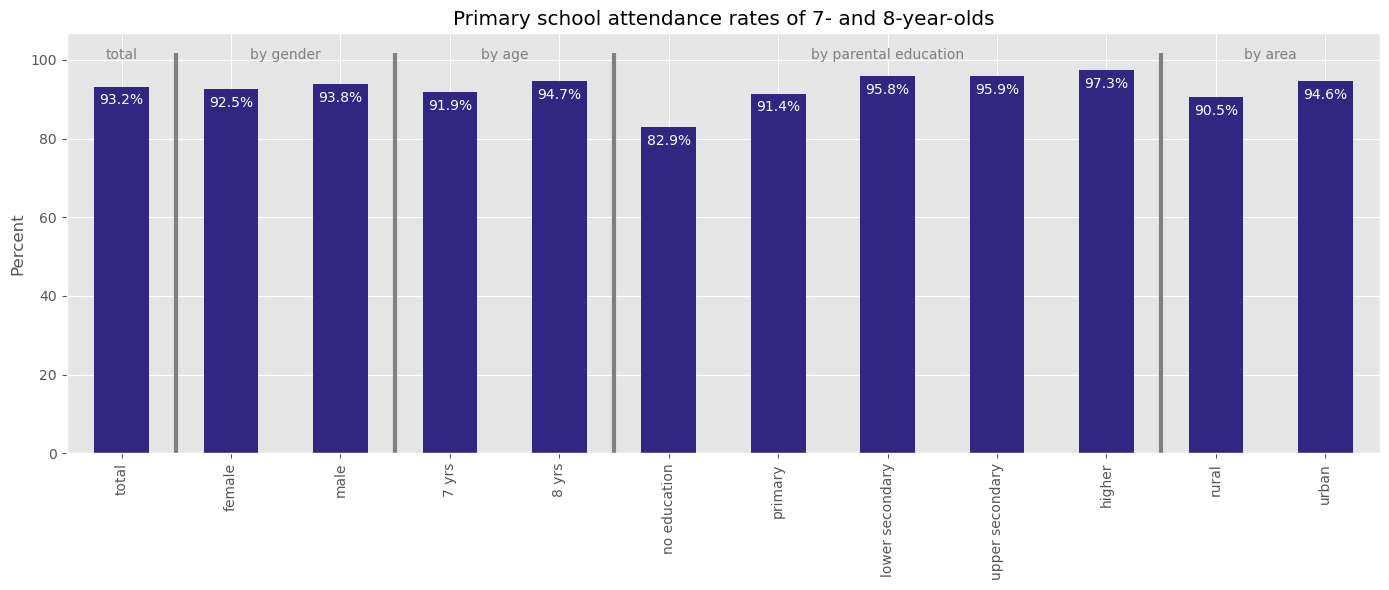

In [100]:
# figure for column 1 (=yes)

fig = pct_prim[1].plot.bar(figsize=(14,6),
                          color='#312783')

for c in fig.containers:
    fig.bar_label(c, color='white', padding=-15, fmt='%.1f%%')
    
fig.set_title('Primary school attendance rates of 7- and 8-year-olds')
fig.set_ylabel('Percent')

ymin,ymax = fig.get_ylim()
fig.vlines(x=[0.5, 2.5, 4.5, 9.5], lw=3, ymin=ymin, ymax=ymax-0.5, color='gray')

fig.text(0, ymax-1, 'total', horizontalalignment='center', verticalalignment='center', color='gray')
fig.text(1.5, ymax-1, 'by gender', horizontalalignment='center', verticalalignment='center', color='gray')
fig.text(3.5, ymax-1, 'by age', horizontalalignment='center', verticalalignment='center', color='gray')
fig.text(7, ymax-1, 'by parental education', horizontalalignment='center', verticalalignment='center', color='gray')
fig.text(10.5, ymax-1, 'by area', horizontalalignment='center', verticalalignment='center', color='gray')

plt.tight_layout()
plt.savefig('fig3_participation_primary.png')

### 4. Secondary school attendance by subgroups

In [73]:
# dataframe for 14- to 16-year-olds

eduSec = mics.loc[mics['age'].isin([*range(14, 17)]), 
                ['secondary_participation', 'age', 'gender', 'area', 'parent_edu', 'hhweight_x']].copy()

eduSec.head()

,secondary_participation,age,gender,area,parent_edu,hhweight_x
8,0.0,15.0,male,urban,upper secondary,0.264968
16,1.0,16.0,male,urban,primary,0.264968
27,1.0,15.0,female,urban,higher,0.264968
41,1.0,16.0,female,urban,higher,0.264968
85,1.0,15.0,male,urban,higher,1.133474


In [74]:
# relative frequencies of total secondary school attendance

eduSec['total'] = 'total'

pct_sec_total = pd.crosstab(index=eduSec['total'], columns=eduSec['secondary_participation'], 
                            values=eduSec['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_total

secondary_participation,0.0,1.0
total,,
total,36.389738,63.610262


In [75]:
# relative frequencies of secondary school attendance by gender

pct_sec_gender = pd.crosstab(index=eduSec['gender'], columns=eduSec['secondary_participation'], 
                            values=eduSec['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_gender

secondary_participation,0.0,1.0
gender,,
female,39.444126,60.555874
male,33.531946,66.468054


In [76]:
# relative frequencies of secondary school attendance by age

pct_sec_age = pd.crosstab(index=eduSec['age'], columns=eduSec['secondary_participation'], 
                            values=eduSec['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_age = pct_sec_age[pct_sec_age.index.isin([*range(14, 17)])]

pct_sec_age.rename(index={14:'14 yrs', 15:'15 yrs', 16:'16 yrs'}, inplace=True)

pct_sec_age

secondary_participation,0.0,1.0
age,,
14 yrs,35.496793,64.503207
15 yrs,34.653834,65.346166
16 yrs,39.117408,60.882592


In [77]:
# relative frequencies of secondary school attendance by parental education

pct_sec_hedulevel = pd.crosstab(index=eduSec['parent_edu'], columns=eduSec['secondary_participation'], 
                            values=eduSec['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_hedulevel = pct_sec_hedulevel.reindex(['no education','primary','lower secondary','upper secondary','higher'])

pct_sec_hedulevel

secondary_participation,0.0,1.0
parent_edu,,
no education,52.580231,47.419769
primary,46.496585,53.503415
lower secondary,39.130789,60.869211
upper secondary,25.898422,74.101578
higher,14.188103,85.811897


In [78]:
# relative frequencies of secondary school attendance by area

pct_sec_area = pd.crosstab(index=eduSec['area'], columns=eduSec['secondary_participation'], 
                            values=eduSec['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_area

secondary_participation,0.0,1.0
area,,
rural,47.805516,52.194484
urban,30.884216,69.115784


In [79]:
# concatenate aggregate tables

pct_sec = pd.concat([pct_sec_total, pct_sec_gender, pct_sec_age, pct_sec_hedulevel, pct_sec_area])

pct_sec

secondary_participation,0.0,1.0
total,36.389738,63.610262
female,39.444126,60.555874
male,33.531946,66.468054
14 yrs,35.496793,64.503207
15 yrs,34.653834,65.346166
16 yrs,39.117408,60.882592
no education,52.580231,47.419769
primary,46.496585,53.503415
lower secondary,39.130789,60.869211
upper secondary,25.898422,74.101578


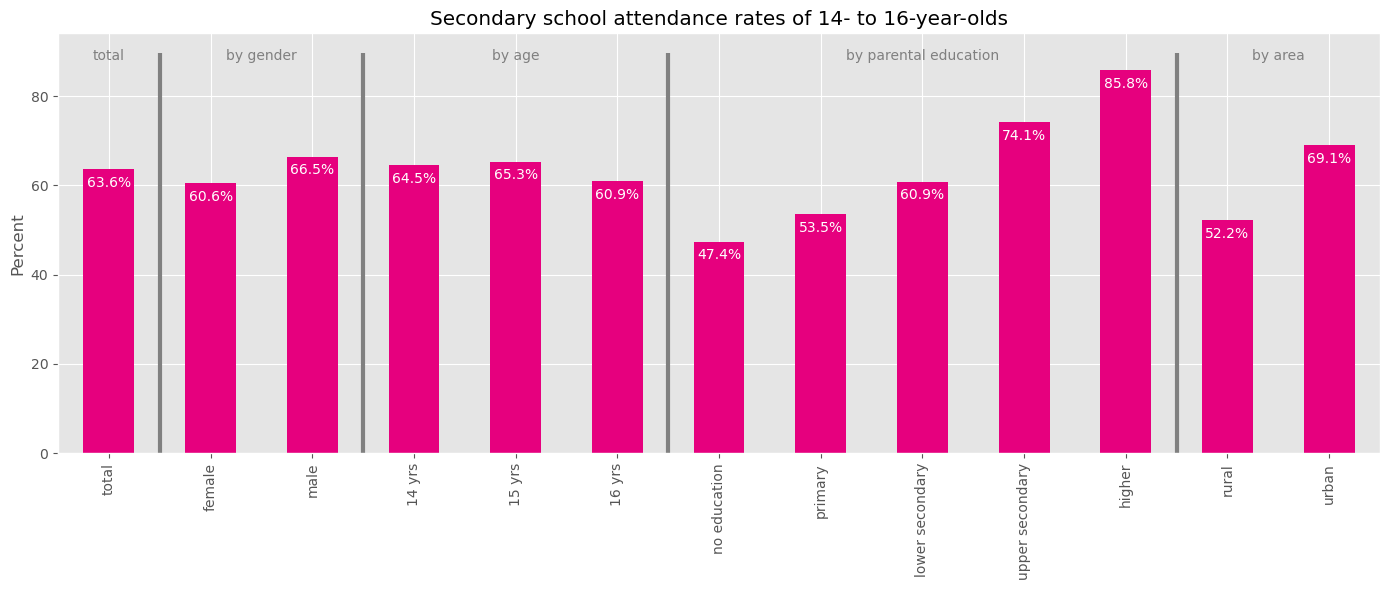

In [80]:
# figure for column 1 (=yes)

fig = pct_sec[1].plot.bar(figsize=(14,6),
                          color='#e6007e')

for c in fig.containers:
    fig.bar_label(c, color='white', padding=-15, fmt='%.1f%%')
    
fig.set_title('Secondary school attendance rates of 14- to 16-year-olds')
fig.set_ylabel('Percent')

ymin,ymax = fig.get_ylim()
fig.vlines(x=[0.5, 2.5, 5.5, 10.5], lw=3, ymin=ymin, ymax=ymax-0.5, color='gray')

fig.text(0, ymax-1, 'total', horizontalalignment='center', verticalalignment='center', color='gray')
fig.text(1.5, ymax-1, 'by gender', horizontalalignment='center', verticalalignment='center', color='gray')
fig.text(4, ymax-1, 'by age', horizontalalignment='center', verticalalignment='center', color='gray')
fig.text(8, ymax-1, 'by parental education', horizontalalignment='center', verticalalignment='center', color='gray')
fig.text(11.5, ymax-1, 'by area', horizontalalignment='center', verticalalignment='center', color='gray')

plt.tight_layout()
plt.savefig('fig4_participation_secondary.png')

### 5. Highest education attended by adult population

In [81]:
# dataframe for individuals born between 1954 and 2003

eduAdult = mics.loc[mics['byear'].isin([*range(1954, 2004)]), ['edulevel', 'byear', 'gender', 'region', 'hhweight_x']].copy()

eduAdult.head()

,edulevel,byear,gender,region,hhweight_x
0,lower secondary,1955.0,male,Duhok,0.264968
1,upper secondary,1959.0,female,Duhok,0.264968
2,higher,1994.0,female,Duhok,0.264968
3,no education,1989.0,female,Duhok,0.264968
4,lower secondary,1974.0,male,Duhok,0.264968


#### Education of adults: total & by gender

In [82]:
# relative frequencies of education of total population

eduAdult['total'] = 'total'

pct_edu_total = pd.crosstab(index=eduAdult['total'], columns=eduAdult['edulevel'], 
                            values=eduAdult['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_edu_total

edulevel,higher,lower secondary,no education,primary,upper secondary
total,,,,,
total,17.498507,23.869913,12.379138,32.480196,13.772247


In [85]:
# Relative frequencies of education by gender

pct_edu_gender = pd.crosstab(index=eduAdult['gender'], columns=eduAdult['edulevel'], 
                            values=eduAdult['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_edu_gender

edulevel,higher,lower secondary,no education,primary,upper secondary
gender,,,,,
female,14.549496,19.524921,18.570007,35.156911,12.198664
male,20.397263,28.140859,6.293770,29.849095,15.319013


In [87]:
# join aggregate tables

pct_edu = pd.concat([pct_edu_total, pct_edu_gender]).reindex(['no education', 'primary', 'lower secondary', 
                                                      'upper secondary', 'higher'], axis='columns')

pct_edu

edulevel,no education,primary,lower secondary,upper secondary,higher
total,12.379138,32.480196,23.869913,13.772247,17.498507
female,18.570007,35.156911,19.524921,12.198664,14.549496
male,6.293770,29.849095,28.140859,15.319013,20.397263


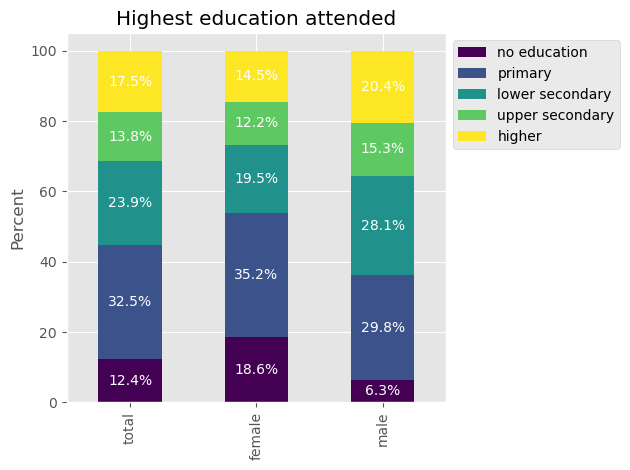

In [82]:
fig = pct_edu.plot.bar(stacked=True, colormap='viridis')

for bar in fig.containers:
    fig.bar_label(bar, label_type='center', color='white', fmt='%.1f%%')
    
fig.legend(bbox_to_anchor=(1, 1), loc=2)
fig.set_ylabel('Percent')
fig.set_title('Highest education attended')

plt.tight_layout()
plt.savefig('fig7_education_attended_adults.png')

#### Education of adults: by birthyear

In [88]:
# relative frequencies by birthyear

eduAdult['byear'] = eduAdult['byear'].astype('string').apply(lambda x: x.split('.')[0])

pct_edu_byear = pd.crosstab(index=eduAdult['byear'], columns=eduAdult['edulevel'], 
                            values=eduAdult['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_edu_byear = pct_edu_byear.reindex(['no education','primary','lower secondary','upper secondary','higher'], 
     axis='columns')

pct_edu_byear

edulevel,no education,primary,lower secondary,upper secondary,higher
byear,,,,,
1954,46.690280,26.573084,9.636116,4.586279,12.514241
1955,38.586694,32.363408,10.148211,4.097484,14.804203
1956,37.785707,29.538866,11.021015,7.060369,14.594044
1957,31.447549,33.300838,10.901169,10.155630,14.194814
1958,40.724871,25.785752,11.216057,5.731984,16.541335
1959,39.489802,21.940656,9.561717,10.932935,18.074889
1960,42.317825,26.082800,10.452646,7.224279,13.922450
1961,35.484378,21.283083,11.161718,9.843908,22.226913
1962,40.806026,21.110447,12.747495,8.430799,16.905233


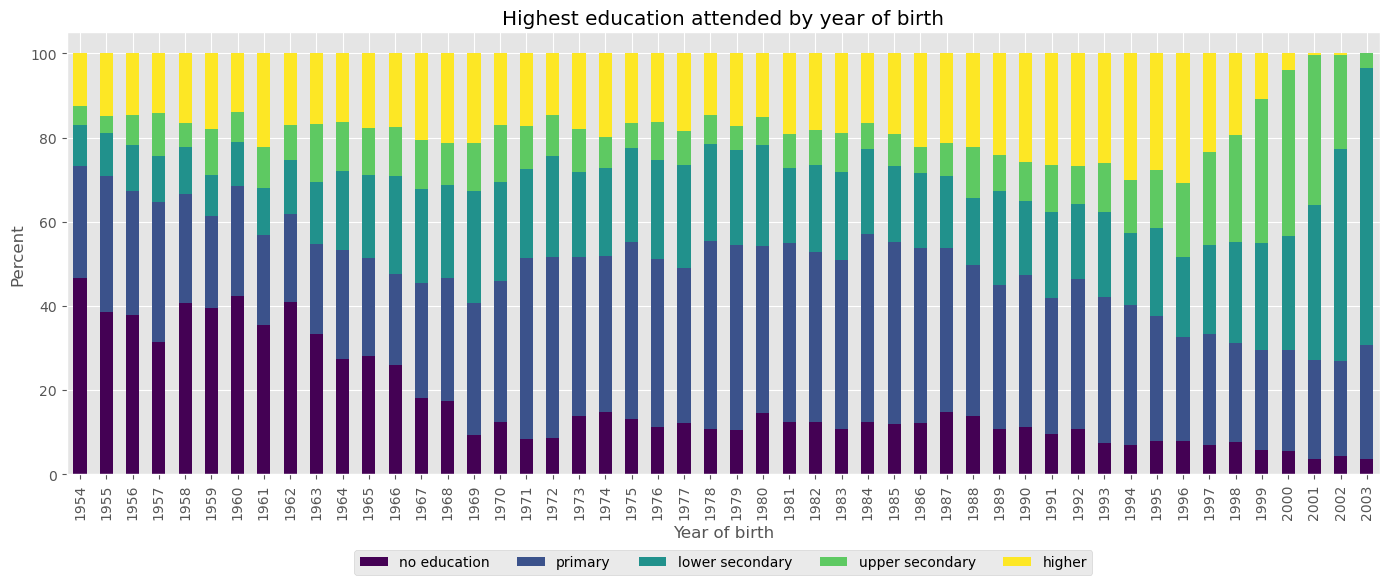

In [89]:
pct_edu_byear.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 6))

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='center', ncol=5)
plt.xlabel('Year of birth')
plt.ylabel('Percent')
plt.title('Highest education attended by year of birth')

plt.tight_layout()
plt.savefig('fig7_education_attended_byear.png')

#### Education of adults: by region

In [87]:
# shapefile
map_df = gpd.read_file('Documents/Data Science/data/irq-administrative-divisions-shapefiles/irq_admbnda_adm1_cso_20190603.shx')

# relative frequencies of educational levels by region (see SQL file for further information)
df = pd.read_excel('Documents/Data Science/data/Iraq MICS6 Datasets/RegioFreq.xlsx')

In [88]:
# merge dataframes
df_merged = map_df.merge(df, left_on=['ADM1_PCODE'], right_on=['pcode'])

In [68]:
df_merged.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1AR,ADM1ALT2AR,...,Region/Governorate,avg_edulevel0,avg_edulevel1,avg_edulevel2,avg_edulevel3,avg_edulevel4,avg_part_ece,avg_part_primary,avg_part_secondary,pcode
0,17.090203,11.953673,Al-Anbar,الانبار,IQG01,NaN,NaN,NaN,NaN,NaN,...,ANBAR,11.414349,36.501187,25.141256,11.074361,15.868847,7.242364,93.960123,65.346675,IQG01
1,8.057029,1.774143,Al-Basrah,البصرة,IQG02,NaN,NaN,NaN,NaN,NaN,...,BASRAH,10.591091,29.667340,31.484655,13.427595,14.797437,12.225566,93.413368,59.604139,IQG02
2,10.084730,4.838574,Al-Muthanna,المثنى,IQG03,NaN,NaN,NaN,NaN,NaN,...,MUTHANA,22.385253,31.742174,26.624246,8.198345,11.049982,5.724676,93.306459,59.366389,IQG03
3,8.959419,3.797184,Al-Najaf,النجف,IQG04,NaN,NaN,NaN,NaN,NaN,...,NAJAF,15.909843,31.893646,23.968015,12.796002,15.409677,8.331728,85.282031,60.712566,IQG04
4,4.772678,0.808105,Al-Qadissiya,القادسية,IQG05,NaN,NaN,NaN,NaN,NaN,...,QADISYAH,13.383332,31.279532,26.284083,13.022670,16.030384,11.314463,89.207011,72.519318,IQG05


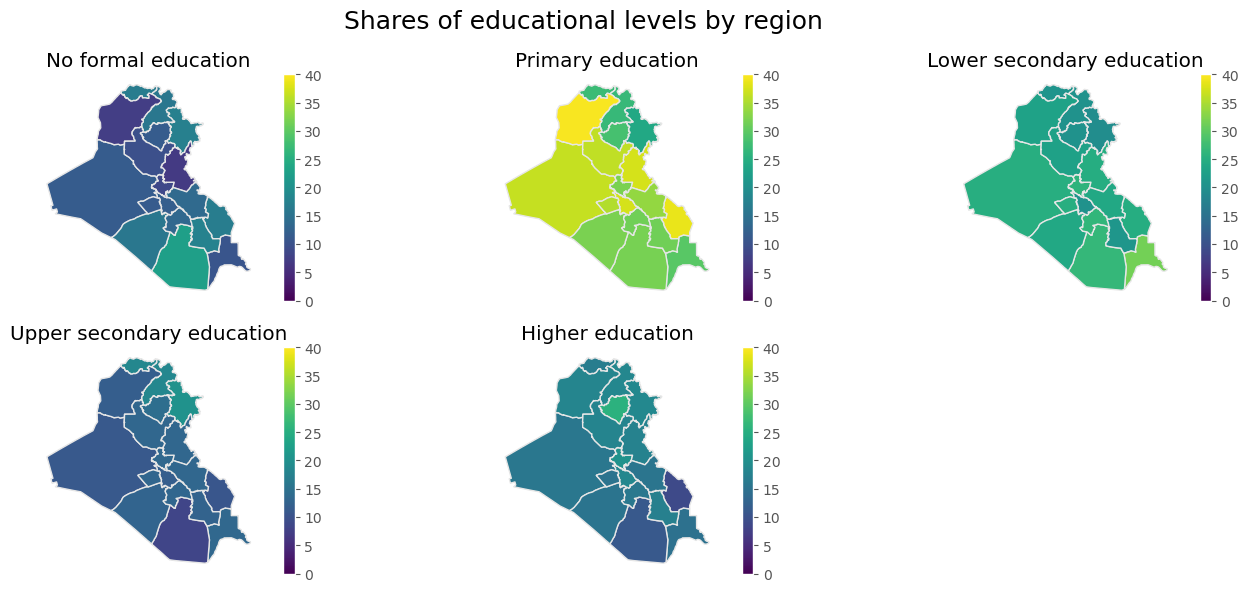

In [108]:
fig = plt.figure(figsize=(14,6))

fig.suptitle('Shares of educational levels by region', fontsize=18)

ax1 = fig.add_subplot(2, 3, 1)
df_merged.plot(column='avg_edulevel0', cmap='viridis', linewidth=1, ax=ax1, edgecolor='0.9', legend=True, vmin=0, vmax=40)
ax1.set_title('No formal education')
ax1.axis('off')

ax2 = fig.add_subplot(2, 3, 2)
df_merged.plot(column='avg_edulevel1', cmap='viridis', linewidth=1, ax=ax2, edgecolor='0.9', legend=True, vmin=0, vmax=40)
ax2.set_title('Primary education')
ax2.axis('off')

ax3 = fig.add_subplot(2, 3, 3)
df_merged.plot(column='avg_edulevel2', cmap='viridis', linewidth=1, ax=ax3, edgecolor='0.9', legend=True, vmin=0, vmax=40)
ax3.set_title('Lower secondary education')
ax3.axis('off')

ax4 = fig.add_subplot(2, 3, 4)
df_merged.plot(column='avg_edulevel3', cmap='viridis', linewidth=1, ax=ax4, edgecolor='0.9', legend=True, vmin=0, vmax=40)
ax4.set_title('Upper secondary education')
ax4.axis('off')

ax5 = fig.add_subplot(2, 3, 5)
df_merged.plot(column='avg_edulevel4', cmap='viridis', linewidth=1, ax=ax5, edgecolor='0.9', legend=True, vmin=0, vmax=40)
ax5.set_title('Higher education')
ax5.axis('off')

plt.tight_layout()
plt.savefig('fig7_education_attended_regional.png')